# Kernel SVM

In this notebook, Support vector machine is implemented with kernel trick.
There are different types of kernels like linear,guassian,polynomial kernels.
In this notebook guassian(rbf) and polynomial kernels with different degrees were implemented to visualize how SVM is classifying and predicting the data set.

In [1]:
# Kernel SVM
# Importing the libraries
import warnings
warnings.simplefilter("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
#for simplicity and visualisation purpose we take Age and Estimated Salary as Indepedendent variables
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\purandur\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting SVM to the Training set with Rbf kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
#number of correct predictions
print(sum(y_pred==y_test))

93


In [11]:
#number of incorrect predictions
print(sum(y_pred!=y_test))

7


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
print(cm)

[[64  4]
 [ 3 29]]


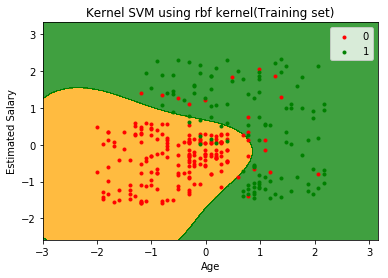

In [14]:
# Visualising the Training set results using rbf kernel
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Kernel SVM using rbf kernel(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

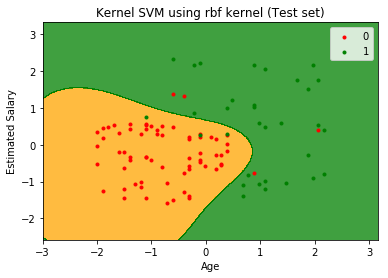

In [15]:
# Visualising the Test set results using rbf kernel
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Kernel SVM using rbf kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Let's repeat the same using Polynomial kernel with degree 1,2,3,4,5

Results of performing Kernel SVM using polynomial kernel with degree 1
Number of correct predictions for poly kernel with degree1: 90
Number of incorrect predictions for poly kernel with degree1: 10
confusion matrix for poly kernel with degree 1:
[[66  2]
 [ 8 24]]


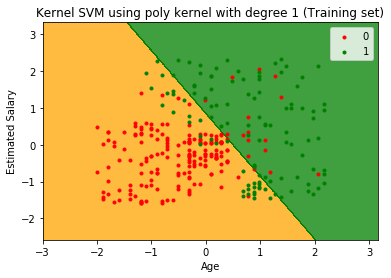

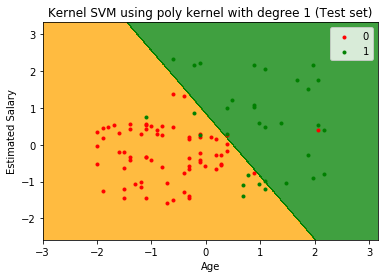

Results of performing Kernel SVM using polynomial kernel with degree 2
Number of correct predictions for poly kernel with degree2: 74
Number of incorrect predictions for poly kernel with degree2: 26
confusion matrix for poly kernel with degree 2:
[[60  8]
 [18 14]]


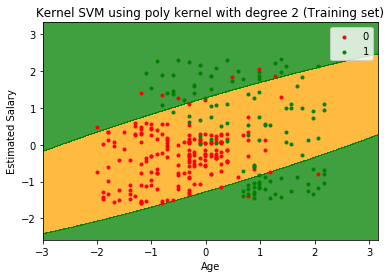

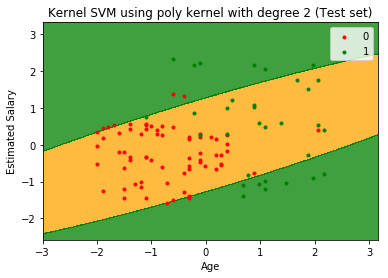

Results of performing Kernel SVM using polynomial kernel with degree 3
Number of correct predictions for poly kernel with degree3: 86
Number of incorrect predictions for poly kernel with degree3: 14
confusion matrix for poly kernel with degree 3:
[[67  1]
 [13 19]]


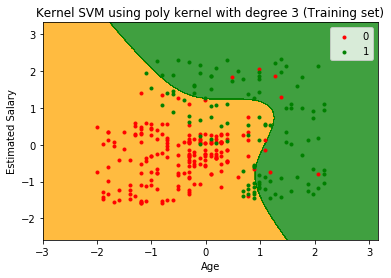

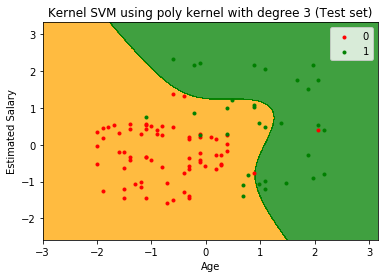

Results of performing Kernel SVM using polynomial kernel with degree 4
Number of correct predictions for poly kernel with degree4: 79
Number of incorrect predictions for poly kernel with degree4: 21
confusion matrix for poly kernel with degree 4:
[[66  2]
 [19 13]]


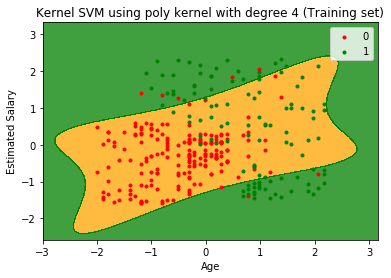

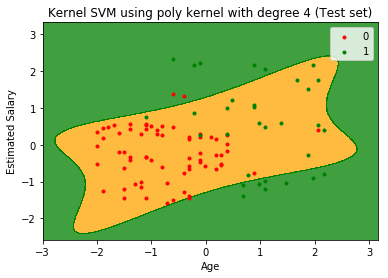

Results of performing Kernel SVM using polynomial kernel with degree 5
Number of correct predictions for poly kernel with degree5: 85
Number of incorrect predictions for poly kernel with degree5: 15
confusion matrix for poly kernel with degree 5:
[[67  1]
 [14 18]]


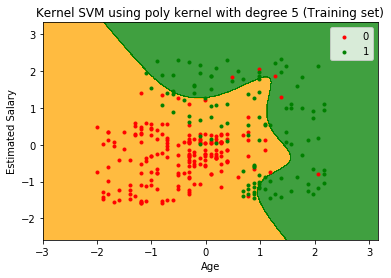

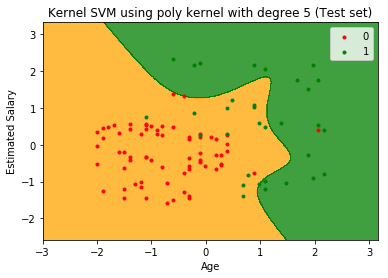

In [16]:
for DEGREE in range(1,6):
    #polynomial kernel with degree (1,2,3,4,5)
    classifier = SVC(kernel = 'poly',degree=DEGREE, random_state = 0)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    print("Results of performing Kernel SVM using polynomial kernel with degree "+str(DEGREE))
    #number of correct predictions
    print("Number of correct predictions for poly kernel with degree"+str(DEGREE)+": "+str(sum(y_pred==y_test)))

    #number of incorrect predictions
    print("Number of incorrect predictions for poly kernel with degree"+str(DEGREE)+": "+str(sum(y_pred!=y_test)))

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    print("confusion matrix for poly kernel with degree "+str(DEGREE)+":")
    print(cm)

    # Visualising the Training set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
    plt.title('Kernel SVM using poly kernel with degree '+str(DEGREE)+' (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

    # Visualising the Test set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
    plt.title('Kernel SVM using poly kernel with degree '+str(DEGREE)+' (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()